## Detecting Corners and Edges using Convolution

### Import libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Read image

In [2]:
img = Image.open("cat.jpg").convert('RGB')

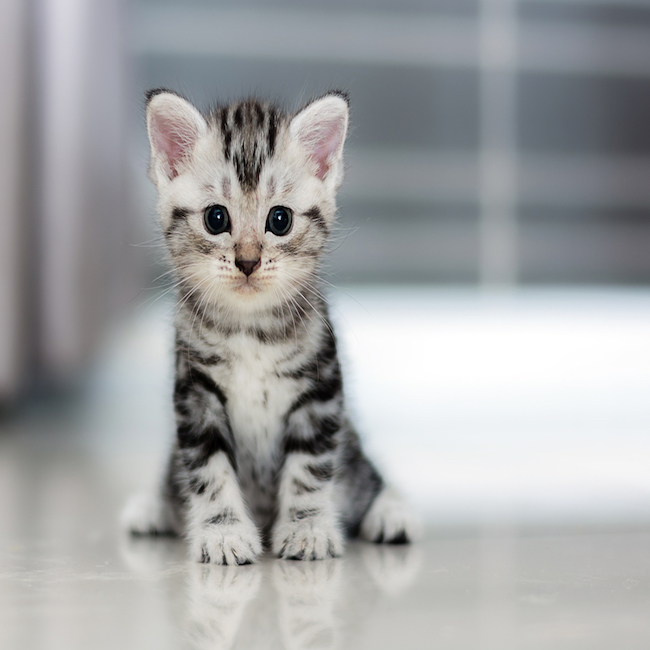

In [3]:
img

### Convert to tensor
* Resize the image and convert to pytorch tensor by applying the transforms

In [4]:
import torch
import torch.nn.functional as F
from torchvision import transforms as tf

In [5]:
transforms = tf.Compose([tf.Resize(256), 
                        tf.ToTensor()])

In [6]:
img_tensor = transforms(img)

In [7]:
img_tensor

tensor([[[0.7451, 0.7412, 0.7333,  ..., 0.4235, 0.4235, 0.4235],
         [0.7451, 0.7373, 0.7333,  ..., 0.4000, 0.4039, 0.4039],
         [0.7412, 0.7373, 0.7294,  ..., 0.3725, 0.3725, 0.3765],
         ...,
         [0.8118, 0.8039, 0.8000,  ..., 0.7529, 0.7529, 0.7529],
         [0.8078, 0.8000, 0.7961,  ..., 0.7529, 0.7490, 0.7490],
         [0.8039, 0.8000, 0.8000,  ..., 0.7529, 0.7490, 0.7451]],

        [[0.7333, 0.7294, 0.7216,  ..., 0.4549, 0.4549, 0.4549],
         [0.7333, 0.7294, 0.7216,  ..., 0.4314, 0.4392, 0.4392],
         [0.7294, 0.7255, 0.7216,  ..., 0.4039, 0.4078, 0.4078],
         ...,
         [0.8000, 0.8000, 0.7961,  ..., 0.7490, 0.7490, 0.7529],
         [0.8000, 0.7961, 0.7961,  ..., 0.7490, 0.7490, 0.7490],
         [0.8000, 0.8000, 0.7961,  ..., 0.7490, 0.7490, 0.7451]],

        [[0.7569, 0.7569, 0.7490,  ..., 0.4941, 0.4941, 0.4941],
         [0.7529, 0.7529, 0.7451,  ..., 0.4667, 0.4667, 0.4667],
         [0.7529, 0.7529, 0.7451,  ..., 0.4353, 0.4353, 0.

In [8]:
img_tensor.shape

torch.Size([3, 256, 256])

### Defining filter
* Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters.
* Filters for sharpen, line and edge detetcion operations are below.

In [9]:
sharpen_kernel = [[[[0, -1, 0]], 
                   [[-1, 5, -1]], 
                   [[0, -1, 0]]]]

In [10]:
horizontal_line_kernel = [[[[1, 0, -1]],
                           [[0, 0, 0]],
                           [[-1, 0, 1]]]]

In [11]:
vertical_line_kernel = [[[[0, 1, 0]],
                         [[1, -4, 1]],
                         [[0, 1, 0]]]]

In [12]:
edge_detection_kernel = [[[[-1, -1, -1]],
                          [[-1, 8, -1]],
                          [[-1, -1, -1]]]]

In [13]:
conv_filter = torch.Tensor(sharpen_kernel) 

In [14]:
conv_filter.shape

torch.Size([1, 3, 1, 3])

### Applying filter
* torch.nn.functional.conv2d accepts custom filters as opposed to torch.nn.conv2d which uses the default kernel
* F.conv2d requires a 4d tensor as input. Hence, the unsqueeze operation

In [15]:
img_tensor = img_tensor.unsqueeze(0)

In [16]:
img_tensor.shape

torch.Size([1, 3, 256, 256])

In [17]:
conv_img = F.conv2d(img_tensor, conv_filter, padding=0)    

In [18]:
conv_img.shape

torch.Size([1, 1, 256, 254])

### Displaying result image
* convert the tensor back to 3d and then to a numpy array for display

In [19]:
conv_img = conv_img[0, :, :, :]
conv_img.shape

torch.Size([1, 256, 254])

In [20]:
conv_img = conv_img.numpy().squeeze()
conv_img.shape

(256, 254)

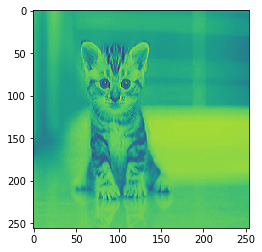

In [21]:
plt.imshow(conv_img)